In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
col_list = cm.viridis(np.linspace(0, 1, 8))
col_list = cm.Blues(np.linspace(0.5, 1, 8))

In [22]:
data = np.loadtxt('burner.out')

In [23]:
z = data[:,0]
s = data[:,1:]
npart = np.sum(s,axis=1)

cmin = 100
Mc = 12.011
Na = 6.02214E26
rhos = 1850.0
mbins = cmin*2**np.arange(len(s[0,:])) * Mc/Na
d = (6*mbins/np.pi/rhos)**(1/3) * 1E9

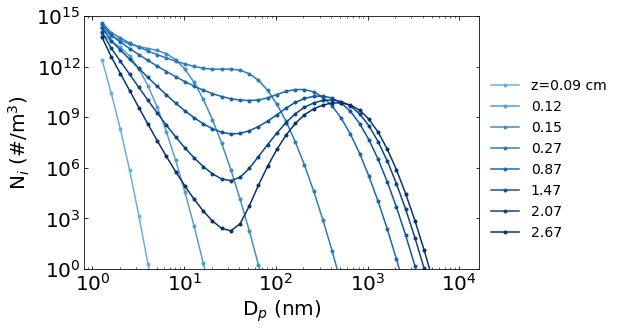

In [24]:
matplotlib.rcParams.update({'font.size':20, 'figure.autolayout': True})
fig, ax = plt.subplots(figsize=(9,5))
ax.tick_params(which='both', direction='in', top=True, right=True)
plt.cla()

ic = 0
plt.plot(d, s[4,:], 'o-', ms=3, color=col_list[ic], label=f'z={z[4]*100:.2f} cm'); ic+=1
plt.plot(d, s[5,:], 'o-', ms=3, color=col_list[ic], label=f'{z[5]*100:.2f}'); ic+=1
plt.plot(d, s[6,:], 'o-', ms=3, color=col_list[ic], label=f'{z[6]*100:.2f}'); ic+=1
for i in range(10,101,20):
    plt.plot(d, s[i,:], 'o-', ms=3, color=col_list[ic], label=f'{z[i]*100:.2f}')
    ic += 1
plt.yscale('log')
plt.xscale('log')
plt.legend(frameon=False, bbox_to_anchor=(1,0.8), fontsize=14)
plt.ylim([1,1E15])
plt.xlabel(r'D$_p$ (nm)')
plt.ylabel(r'N$_i$ (#/m$^3$)')
plt.savefig('sectional.pdf')

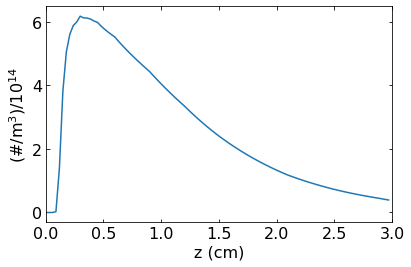

In [25]:
M0 = np.sum(s,axis=1)

matplotlib.rcParams.update({'font.size':16, 'figure.autolayout': True})
fig, ax = plt.subplots()#figsize=(9,5))
ax.tick_params(which='both', direction='in', top=True, right=True)
plt.cla()

plt.plot(z*100,M0/1E14)
plt.ylabel(r'(#/m$^3$)/10$^{14}$')
plt.xlabel(r'z (cm)')
plt.xlim([0,3]);